## 07-07 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

기울기 소실(Gradient Vanishing): 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다.  
기울기 폭주(Gradient Exploding): 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 그럼 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 다뤄 봅시다.

### ReLU와 ReLU의 변형들

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것입니다.

### 그래디언트 클리핑(Gradient Clipping)

그래디언트 클리핑: 말 그대로 기울기 값을 자르는 것을 의미합니다. 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자릅니다. 다시 말해서 임계치만큼 크기를 감소시킵니다.

In [1]:
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

### 가중치 초기화(Weight initialization)

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.

1. 세이비어 초기화(Xavier Initialization)

균등 분포를 사용하여 가중치 초기화  
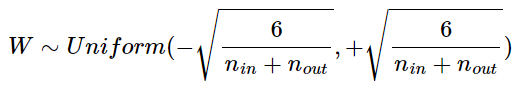

정규 분포를 사용하여 가중치 초기화  
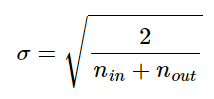

세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않습니다.

2. He 초기화(He initialization)

균등 분포를 사용하여 가중치 초기화  
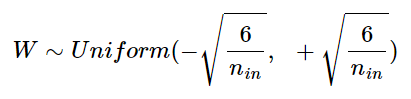

정규 분포를 사용하여 가중치 초기화  
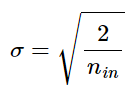

ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.

### 배치 정규화(Batch Normalization)

ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만, 이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있습니다. 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)입니다. 배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

1. 내부 공변량 변화(Internal Covariate Shift)

내부 공변량 변화: 모델 학습 전에 입력 Feature 간 데이터 범위를 조정할 수 있지만, 모델 학습 과정에서 Layer를 통과할 때마다 출력값의 데이터 분포는 Layer마다 다르게 나타나는 현상이 나타납니다. 활성화 값이 한 쪽으로 치우친다는 것은 다수의 노드들이 같은 값을 출력한다는 의미이므로, 노드 여러 개를 둔 의미가 없다는 것이므로, 표현력이 제한된다는 뜻입니다. 따라서 각 층에서의 활성화 값이 고르게 분포되어야 합니다.  
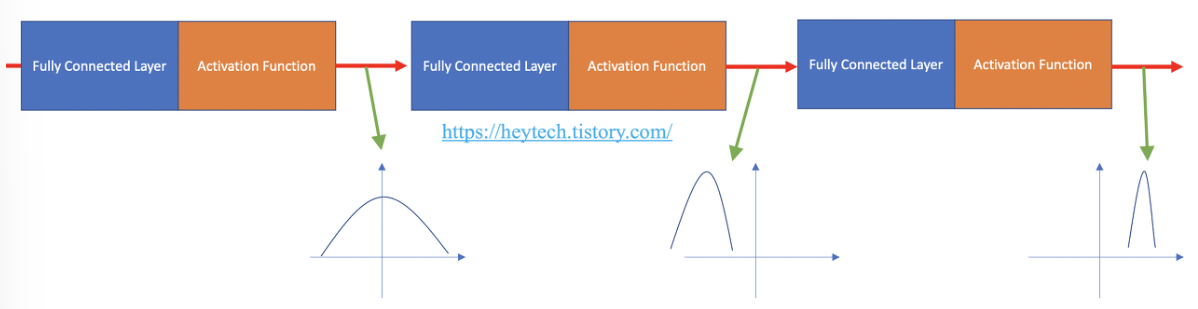  

2. 배치 정규화(Batch Normalization)

배치 정규화: 매 층마다 독립적으로 평균 0, 표준편차 1인 분포를 따르도록 정규화해서 각 미니 배치들이 표준 정규 분포를 따르도록 강제합니다. 그리고 γ, β라는 값을 이용해서, 원본 값의 평균과 분산을 0,1로 만들면서 활성화 함수로 선형 함수를 사용하게 되면 층을 깊게 쌓을 때의 이점이 사라지는 문제점을 해결해줍니다. γ는 가중치 값의 분포의 너비를 결정하며, β는 가중치 값의 분포의 이동 위치를 결정하며 이 때 곱해지고 더해지는 파라미터 γ,β는 각 노드마다 다른 값이 적용됩니다. 다시 말하면, 훈련하는 동안 데이터 분포의 평균과 분산이 바뀌더라도 이에 적응하여 데이터를 표준 정규화하는 것입니다. 
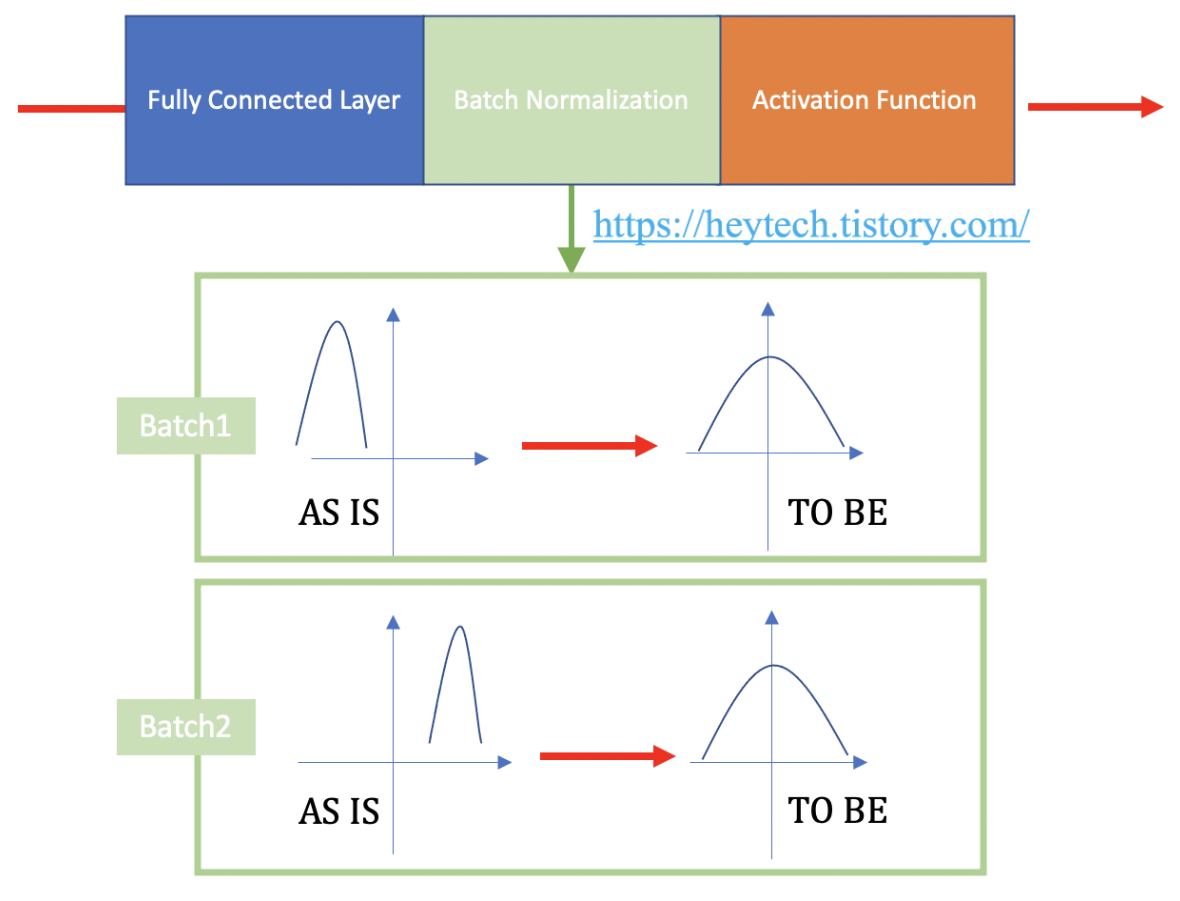  
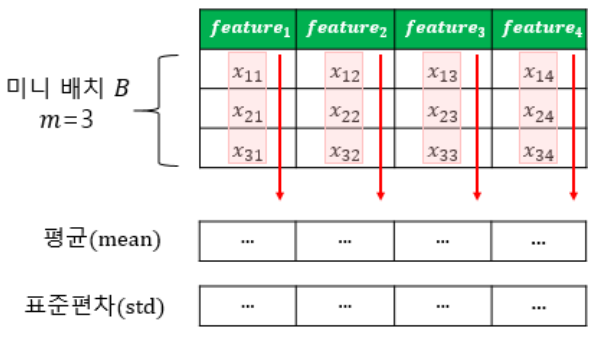  
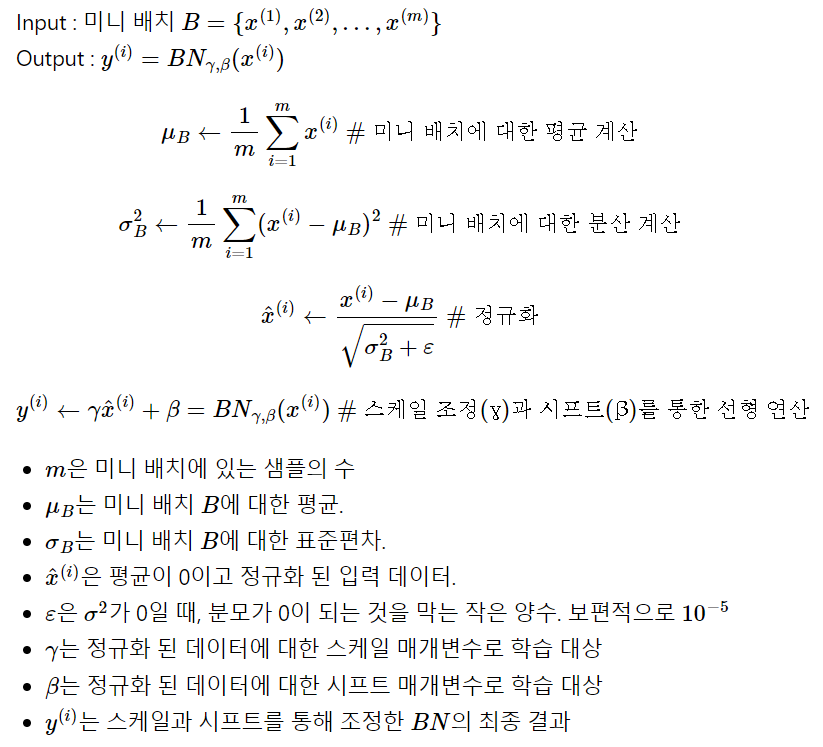

2. 장점

- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.  
- 가중치 초기화에 훨씬 덜 민감해집니다.  
- 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.  
- 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과도 냅니다. 다시 말해, 마치 드롭아웃과 비슷한 효과를 냅니다. 물론, 드롭 아웃과 함께 사용하는 것이 좋습니다.  
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.

3. 한계

- 미니 배치 크기에 의존적이다.

배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있습니다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋습니다. 

- RNN에 적용하기 어렵다.

배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 적용하는 것이 더 좋습니다.

### 층 정규화(Layer Normalization)

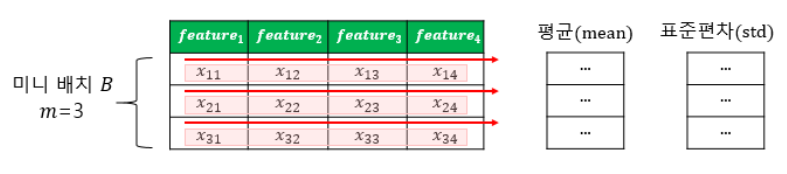